In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import requests
from bs4 import BeautifulSoup

In [2]:
# Load tokenizer and model
model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [3]:
# Extract text from URL
def extract_text_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except Exception as e:
        print(f"❌ Failed to retrieve URL: {e}")
        return ""

    soup = BeautifulSoup(response.text, 'html.parser')
    
    for script in soup(["script", "style"]):
        script.extract()

    text = soup.get_text(separator=' ')
    lines = (line.strip() for line in text.splitlines())
    clean_text = ' '.join(line for line in lines if line)

    return clean_text[:1000]  # Limit text size to 1000 characters

In [4]:
# Analyze emotion
def analyze_emotion(text):
    if not text.strip():
        print("⚠️ Empty text detected.")
        return "neutral", {}

    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    probs_np = probs.detach().numpy()[0]

    labels = model.config.id2label
    emotion_scores = {labels[i]: float(probs_np[i]) for i in range(len(labels))}

    top_emotion = max(emotion_scores, key=emotion_scores.get)

    return top_emotion, emotion_scores

In [5]:
# Plot emotions
def plot_emotions(emotion_scores, title="Emotion Analysis"):
    if not emotion_scores:
        print("⚠️ No emotions to plot.")
        return
    
    emotions = list(emotion_scores.keys())
    scores = list(emotion_scores.values())

    plt.figure(figsize=(8, 4))
    bars = plt.bar(emotions, scores, color='skyblue')
    plt.title(title)
    plt.xlabel('Emotions')
    plt.ylabel('Scores')
    plt.ylim(0, 1)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center')

    plt.show()

EXAMPLE 1


🔸 Dominant Emotion: joy
🔸 Emotion Scores: {'sadness': 0.00022436051222030073, 'joy': 0.9984482526779175, 'love': 0.00029305415228009224, 'anger': 0.00013989920262247324, 'fear': 0.00020461558597162366, 'surprise': 0.0006898078718222678}


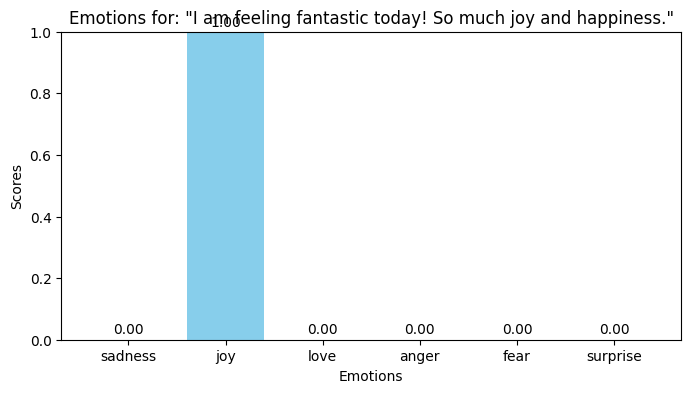

In [6]:
text = "I am feeling fantastic today! So much joy and happiness."

top_emotion, emotion_scores = analyze_emotion(text)

print("\n🔸 Dominant Emotion:", top_emotion)
print("🔸 Emotion Scores:", emotion_scores)

plot_emotions(emotion_scores, title=f"Emotions for: \"{text}\"")

EXAMPLE 2


🔸 Dominant Emotion: joy
🔸 Emotion Scores: {'sadness': 0.01072273962199688, 'joy': 0.9086236357688904, 'love': 0.0036020255647599697, 'anger': 0.04623626172542572, 'fear': 0.02590516395866871, 'surprise': 0.00491006625816226}


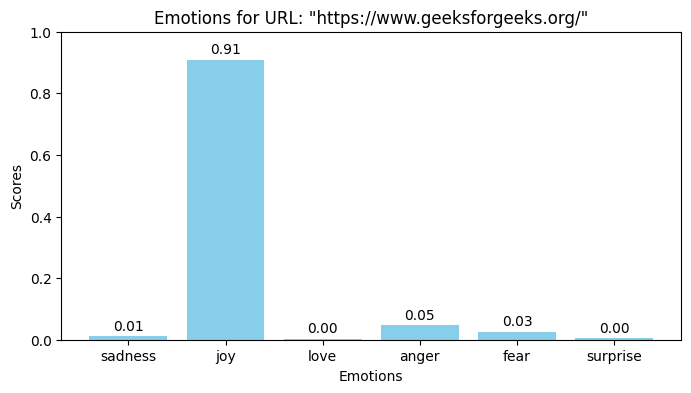

In [7]:
url = "https://www.geeksforgeeks.org/"
text_from_url = extract_text_from_url(url)

if text_from_url:
    top_emotion, emotion_scores = analyze_emotion(text_from_url)

    print(f"\n🔸 Dominant Emotion: {top_emotion}")
    print("🔸 Emotion Scores:", emotion_scores)

    plot_emotions(emotion_scores, title=f"Emotions for URL: \"{url}\"")
else:
    print("⚠️ No content extracted from the URL!")

EXAMPLE 3


🔸 Dominant Emotion: anger
🔸 Emotion Scores: {'sadness': 0.0795353502035141, 'joy': 0.19273647665977478, 'love': 0.00512023875489831, 'anger': 0.6264635324478149, 'fear': 0.09375225752592087, 'surprise': 0.0023920568637549877}


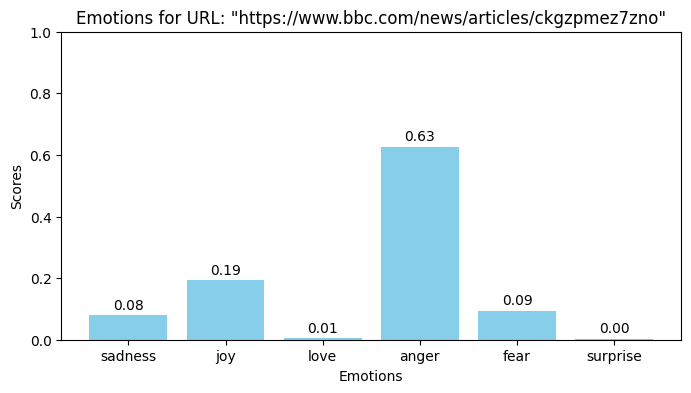

In [8]:
url = "https://www.bbc.com/news/articles/ckgzpmez7zno"
text_from_url = extract_text_from_url(url)

if text_from_url:
    top_emotion, emotion_scores = analyze_emotion(text_from_url)

    print(f"\n🔸 Dominant Emotion: {top_emotion}")
    print("🔸 Emotion Scores:", emotion_scores)

    plot_emotions(emotion_scores, title=f"Emotions for URL: \"{url}\"")
else:
    print("⚠️ No content extracted from the URL!")